In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[149.5  141.5  138.5 ]
   [153.5  145.5  142.5 ]
   [140.5  132.5  129.5 ]
   ...
   [176.5  172.5  173.5 ]
   [180.5  176.5  177.5 ]
   [165.25 161.25 162.25]]

  [[142.75 134.75 131.75]
   [146.25 138.25 135.25]
   [152.   144.   141.  ]
   ...
   [186.5  182.5  183.5 ]
   [194.25 190.25 191.25]
   [165.5  161.5  162.5 ]]

  [[142.5  134.5  131.5 ]
   [144.75 136.75 133.75]
   [154.75 146.75 143.75]
   ...
   [185.75 181.75 182.75]
   [176.75 172.75 173.75]
   [177.25 173.25 174.25]]

  ...

  [[153.5  145.5  143.5 ]
   [133.5  125.5  123.5 ]
   [141.   133.   131.  ]
   ...
   [169.25 165.25 166.25]
   [173.25 169.25 170.25]
   [171.75 167.75 168.75]]

  [[135.5  127.5  125.5 ]
   [144.75 136.75 134.75]
   [134.5  126.5  124.5 ]
   ...
   [149.75 145.75 146.75]
   [168.75 164.75 165.75]
   [167.   163.   164.  ]]

  [[141.   133.   131.  ]
   [148.   140.   138.  ]
   [150.75 142.75 140.75]
   ...
   [165.   161.   162.  ]
   [161.5  157.5  158.5 ]
   [164.5  160.5  16

### Building Model

In [6]:
cnn = tf.keras.models.Sequential()

### Building convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\admin\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [17]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1218s 553ms/step - accuracy: 0.4016 - loss: 2.1131 - val_accuracy: 0.8403 - val_loss: 0.5108
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1166s 530ms/step - accuracy: 0.8309 - loss: 0.5444 - val_accuracy: 0.9075 - val_loss: 0.2870
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1157s 526ms/step - accuracy: 0.9018 - loss: 0.3040 - val_accuracy: 0.8975 - val_loss: 0.3246
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1280s 583ms/step - accuracy: 0.9313 - loss: 0.2163 - val_accuracy: 0.9520 - val_loss: 0.1515
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1202s 547ms/step - accuracy: 0.9527 - loss: 0.1459 - val_accuracy: 0.9488 - val_loss: 0.1599
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1252s 570ms/step - accuracy: 0.9628 - loss: 0.1179 - val_accuracy: 0.9602 - val_loss: 0.1287
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1219s 555ms/step - accuracy: 0.9693 - loss: 0.0921 - val_accuracy: 0.9504 - val_loss: 0.1642
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1154s 525ms/s

In [20]:
class_name =validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

# Model evaluation

In [21]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 313s 142ms/step - accuracy: 0.9847 - loss: 0.0504
Training accuracy: 0.9855750799179077


In [22]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 69s 125ms/step - accuracy: 0.9569 - loss: 0.1359
Validation accuracy: 0.9572615623474121


# Saving model

In [23]:
cnn.save('trained_plant_disease_model.keras')

In [24]:
training_history.history #Return Dictionary of history

{'accuracy': [0.593441903591156,
  0.8555658459663391,
  0.9120420813560486,
  0.9377338290214539,
  0.9547621011734009,
  0.9646205306053162,
  0.9709225296974182,
  0.9763283133506775,
  0.9790027737617493,
  0.982032835483551],
 'loss': [1.3696966171264648,
  0.46022123098373413,
  0.27096420526504517,
  0.19369390606880188,
  0.13786767423152924,
  0.10978125035762787,
  0.08818069100379944,
  0.07294671982526779,
  0.06629955768585205,
  0.05424439162015915],
 'val_accuracy': [0.8403141498565674,
  0.9075233340263367,
  0.89750736951828,
  0.9520259499549866,
  0.9487821459770203,
  0.9602208137512207,
  0.9504324793815613,
  0.9665945768356323,
  0.9611882567405701,
  0.9572615623474121],
 'val_loss': [0.510849118232727,
  0.2869674563407898,
  0.3246273398399353,
  0.15148042142391205,
  0.15992914140224457,
  0.12873660027980804,
  0.1641528308391571,
  0.11145805567502975,
  0.13795794546604156,
  0.14300671219825745]}

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Accuracy Visualization

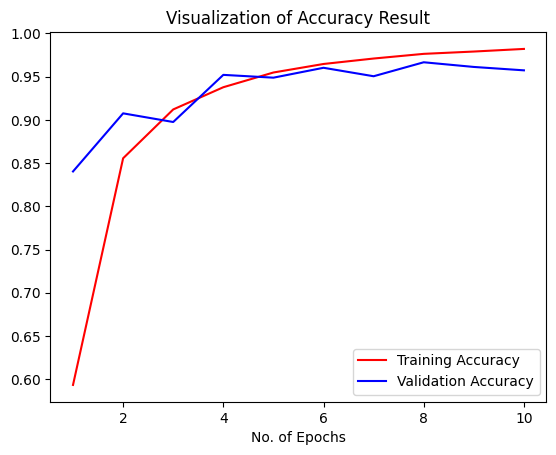

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation"

In [28]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 222s 13ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
!pip install scikit-learn


In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

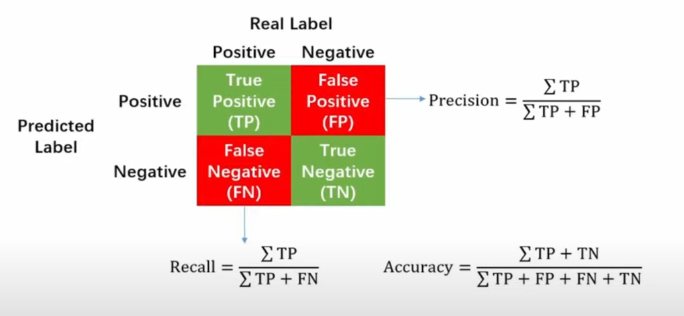

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.84      0.91       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.94      0.98      0.96       440
                                   Apple___healthy       0.88      0.98      0.92       502
                               Blueberry___healthy       0.97      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.90      0.99      0.94       421
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.91      0.92       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

# Confusion Matrix Visualization

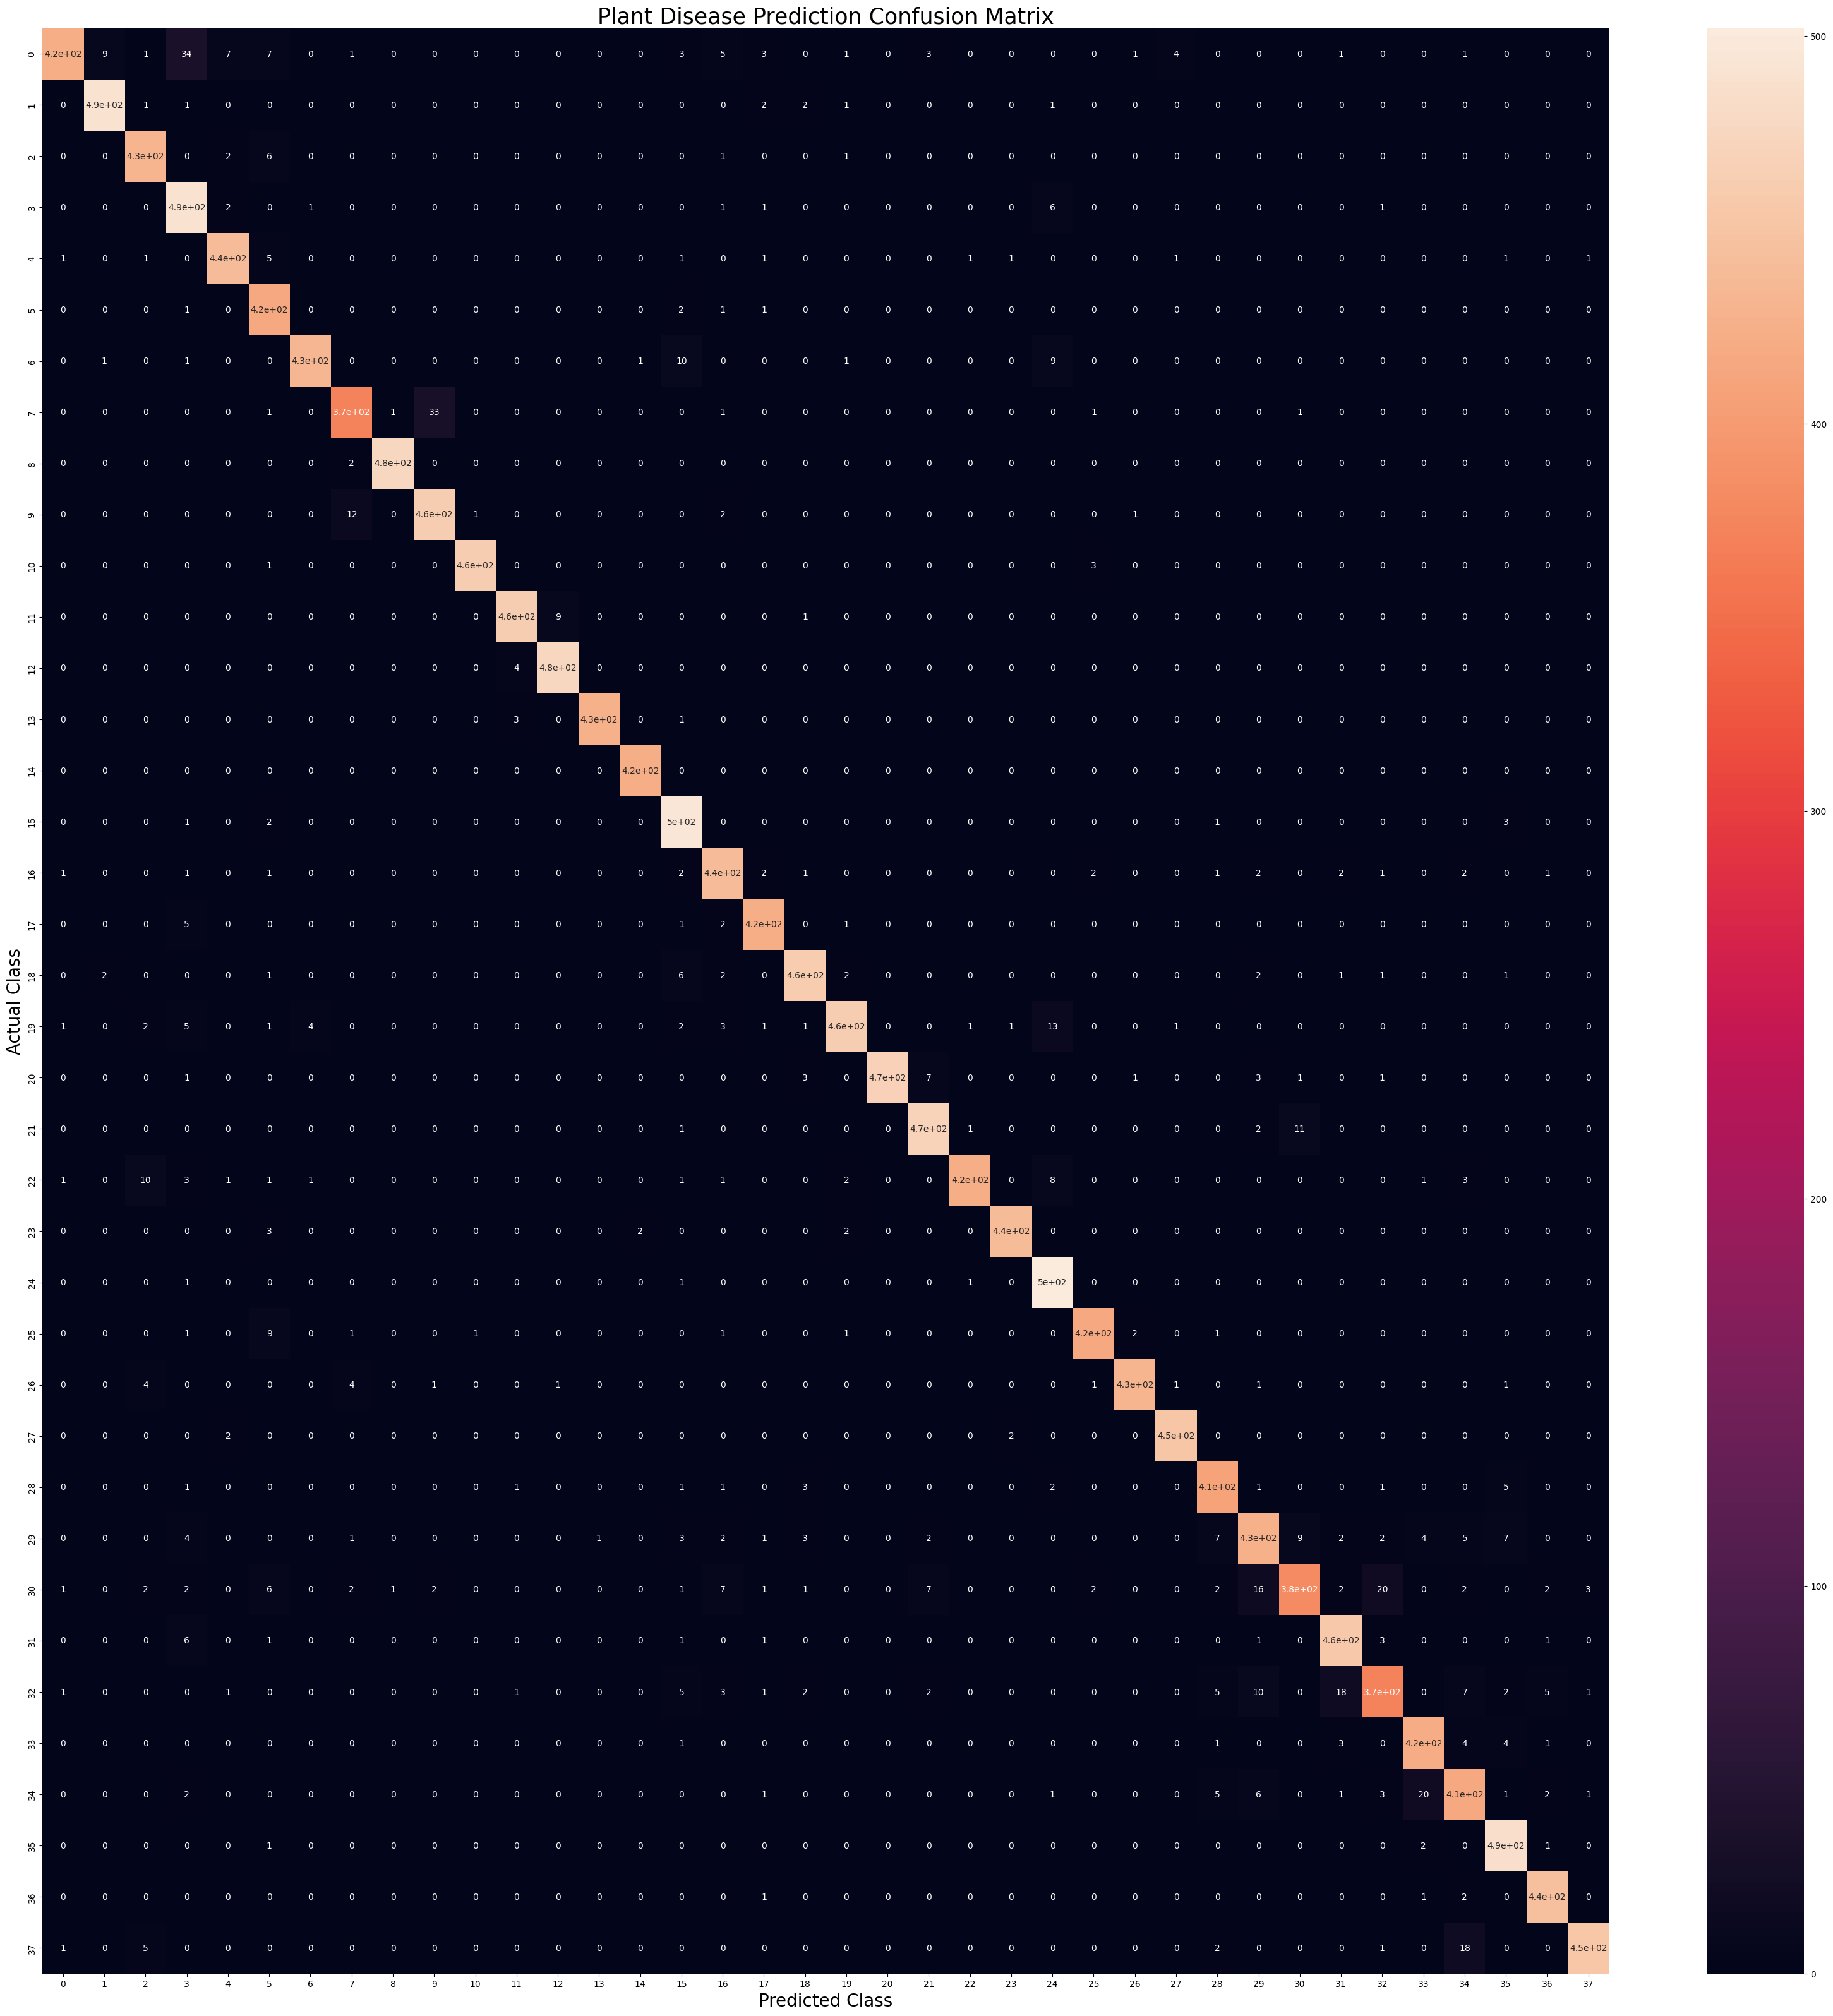

In [37]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()